importing the libraries


In [178]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import dataset and extract dependent and independent variables

In [179]:
# importing the dataset
salary_data = pd.read_csv("/content/Salary_dataset.csv")

In [180]:

# Extracting the dependent and independent variables, excluding the index column
x = salary_data.iloc[:, 1:-1].values  # Exclude the first and the last column
y = salary_data.iloc[:, -1].values   # Assuming you want the last column (index 4 in zero-based indexing)



In [181]:
salary_data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [182]:
salary_data.shape

(30, 3)

In [183]:
salary_data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [184]:
salary_data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [185]:
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [186]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

Visualising the dataset


<ipython-input-187-7f27b3647337>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data["YearsExperience"],kde = False, bins=10)


<Axes: xlabel='YearsExperience'>

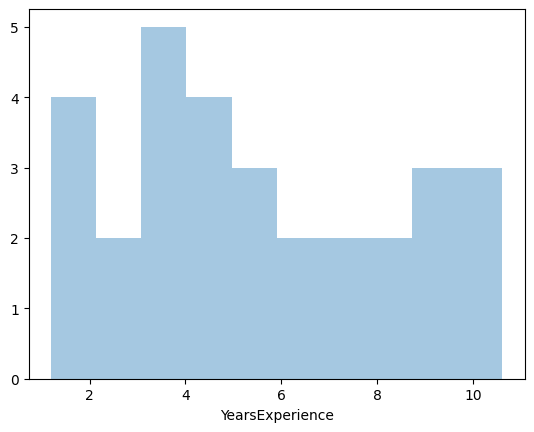

In [187]:
sns.distplot(salary_data["YearsExperience"],kde = False, bins=10)

<Axes: xlabel='count', ylabel='YearsExperience'>

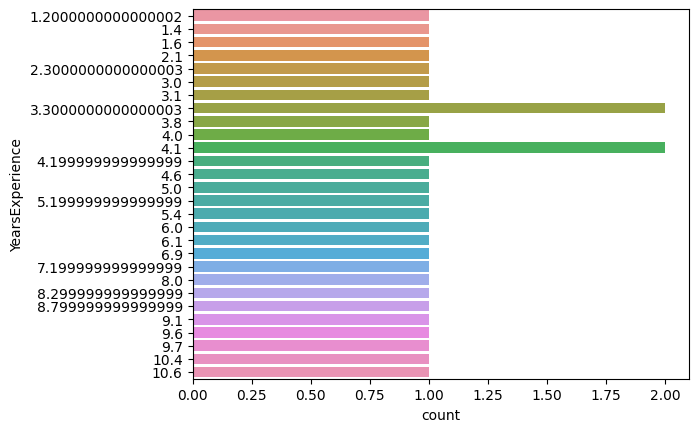

In [188]:
sns.countplot(y= "YearsExperience",data= salary_data)

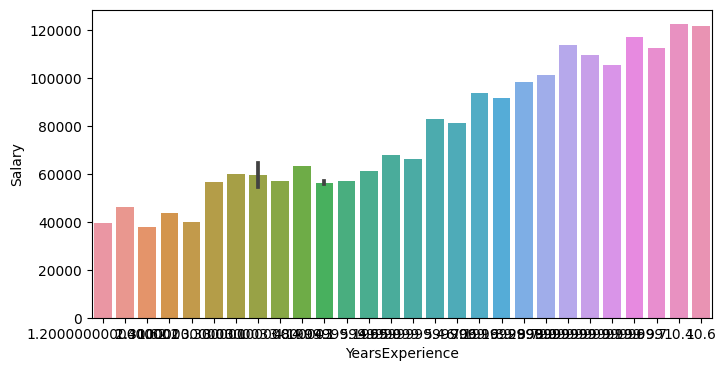

In [189]:
# Increase the figure size
plt.figure(figsize=(8, 4))

# Create the barplot
sns.barplot(x="YearsExperience", y="Salary", data=salary_data)


# Show the plot
plt.show()


<Axes: >

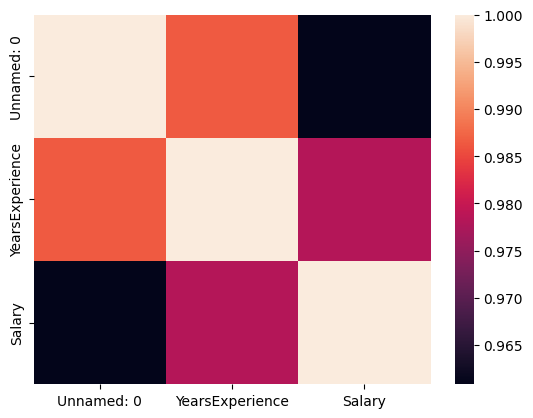

In [190]:
sns.heatmap(salary_data.corr())

Spliting the dataset into the Training set and Test set

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [192]:
x_train

array([[ 9.7],
       [ 4.1],
       [ 5.4],
       [ 8. ],
       [ 3. ],
       [ 5.2],
       [ 3.3],
       [ 4.6],
       [ 8.3],
       [ 6.9],
       [ 1.4],
       [10.6],
       [ 3.1],
       [ 2.3],
       [ 6. ],
       [ 6.1],
       [ 3.8],
       [ 3.3],
       [ 9.1],
       [ 2.1],
       [ 1.2],
       [ 7.2],
       [ 5. ],
       [ 4.1]])

In [193]:
x_test

array([[ 1.6],
       [10.4],
       [ 4.2],
       [ 4. ],
       [ 9.6],
       [ 8.8]])

In [194]:
y_train

array([112636.,  55795.,  83089., 101303.,  56643.,  66030.,  64446.,
        61112., 113813.,  91739.,  46206., 121873.,  60151.,  39892.,
        81364.,  93941.,  57190.,  54446., 105583.,  43526.,  39344.,
        98274.,  67939.,  56958.])

In [195]:
y_test

array([ 37732., 122392.,  57082.,  63219., 116970., 109432.])

Fitting Simple Linear Regression to the Training set

In [196]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()


# Fit the model to the training data
lr.fit(x_train, y_train)

LinearRegression()

Predicting the Test set results

In [203]:

y_pred = lr.predict(x_test)
y_pred

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [198]:
y_test

array([ 37732., 122392.,  57082.,  63219., 116970., 109432.])

Visualising the Training set results

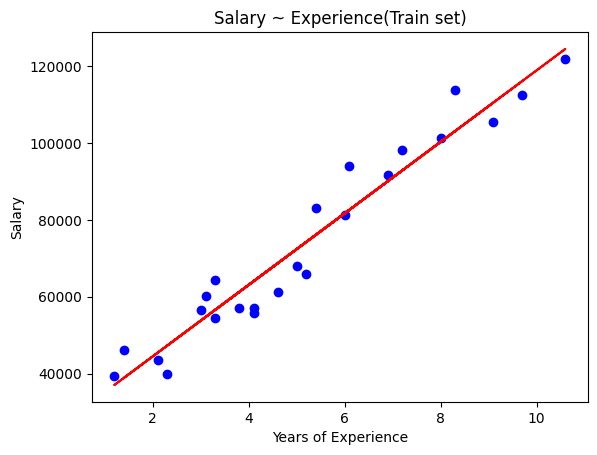

In [199]:
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train,lr.predict(x_train), color= "red")
plt.title("Salary ~ Experience(Train set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Visualisin the Test set results

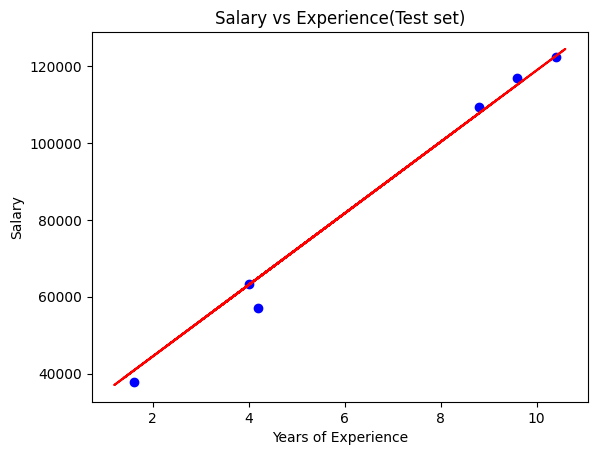

In [200]:
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_train,lr.predict(x_train), color= "red")
plt.title("Salary vs Experience(Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Finding the Residuals

In [201]:
# Calculating the Residuals
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 2446.17236904651
MSE: 12823412.298126565
RMSE: 49.458794658245665


since RMSE value is too less,the model is good model
